# Wild Blueberry Yield Prediction with EDA and Model Diagnostic

"The dataset used for predictive modeling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agroecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches."

The aim it to predict blueberry yield

Features Unit Description:
- Clonesize m2 The average blueberry clone size in the field
- Honeybee bees/m2/min Honeybee density in the field
- Bumbles bees/m2/min Bumblebee density in the field
- Andrena bees/m2/min Andrena bee density in the field
- Osmia bees/m2/min Osmia bee density in the field
- MaxOfUpperTRange ℃ The highest record of the upper band daily air temperature during the bloom season
- MinOfUpperTRange ℃ The lowest record of the upper band daily air temperature
- AverageOfUpperTRange ℃ The average of the upper band daily air temperature
- MaxOfLowerTRange ℃ The highest record of the lower band daily air temperature
- MinOfLowerTRange ℃ The lowest record of the lower band daily air temperature
- AverageOfLowerTRange ℃ The average of the lower band daily air temperature
- RainingDays Day The total number of days during the bloom season, each of which has precipitation larger than zero
- AverageRainingDays Day The average of raining days of the entire bloom season
- 'fruitset', 'fruitmass', 'seeds' **non** defined

Resources:
- [Kaggle challenge](https://www.kaggle.com/competitions/playground-series-s3e14/overview)

In [3]:
!pip install "numpy>=1.16.5,<1.23.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 50.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorflow-serving-api 2.11.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
pymc3 3.11.5 requires numpy<1.22.2,>=1.15.0, but you have numpy 1.22.4 which is incompatible.
pymc3 3.11.5 requires scipy<1.8.0,>=1.7.3, but you have scipy 1.9.3 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
beatrix-jupyterlab 2023.46.184821 requires jupyter-server~=1.16, but you have ju

In [4]:
# importing standard libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit

from xgboost import XGBRegressor

import lightgbm as lgb

In [5]:
# Define Seaborn theme parameters
theme_parameters =  {
    'axes.spines.right': False,
    'axes.spines.top': False,
    'grid.alpha':0.3,
    'axes.titlesize': 16,
    'figure.figsize': (12, 4),
}

# Set the theme
sns.set_theme(style='whitegrid',
              palette=sns.color_palette('colorblind'), 
              rc=theme_parameters)

# Read Data

In [6]:
read_from_kaggle = True

In [7]:
if read_from_kaggle:
    
    df_train = pd.read_csv("/kaggle/input/playground-series-s3e14/train.csv")
    df_test = pd.read_csv("/kaggle/input/playground-series-s3e14/test.csv")
    
else:

    df_train = pd.read_csv("./../data/blueberry_train.csv")
    df_test = pd.read_csv("./../data/blueberry_test.csv")

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [7]:
df_train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [8]:
df_train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


In [9]:
# drop id column
df_train = df_train.drop(columns='id', axis=1)

# Exploratory Data Analysis - EDA

## Features distribution train vs validation set KDEs

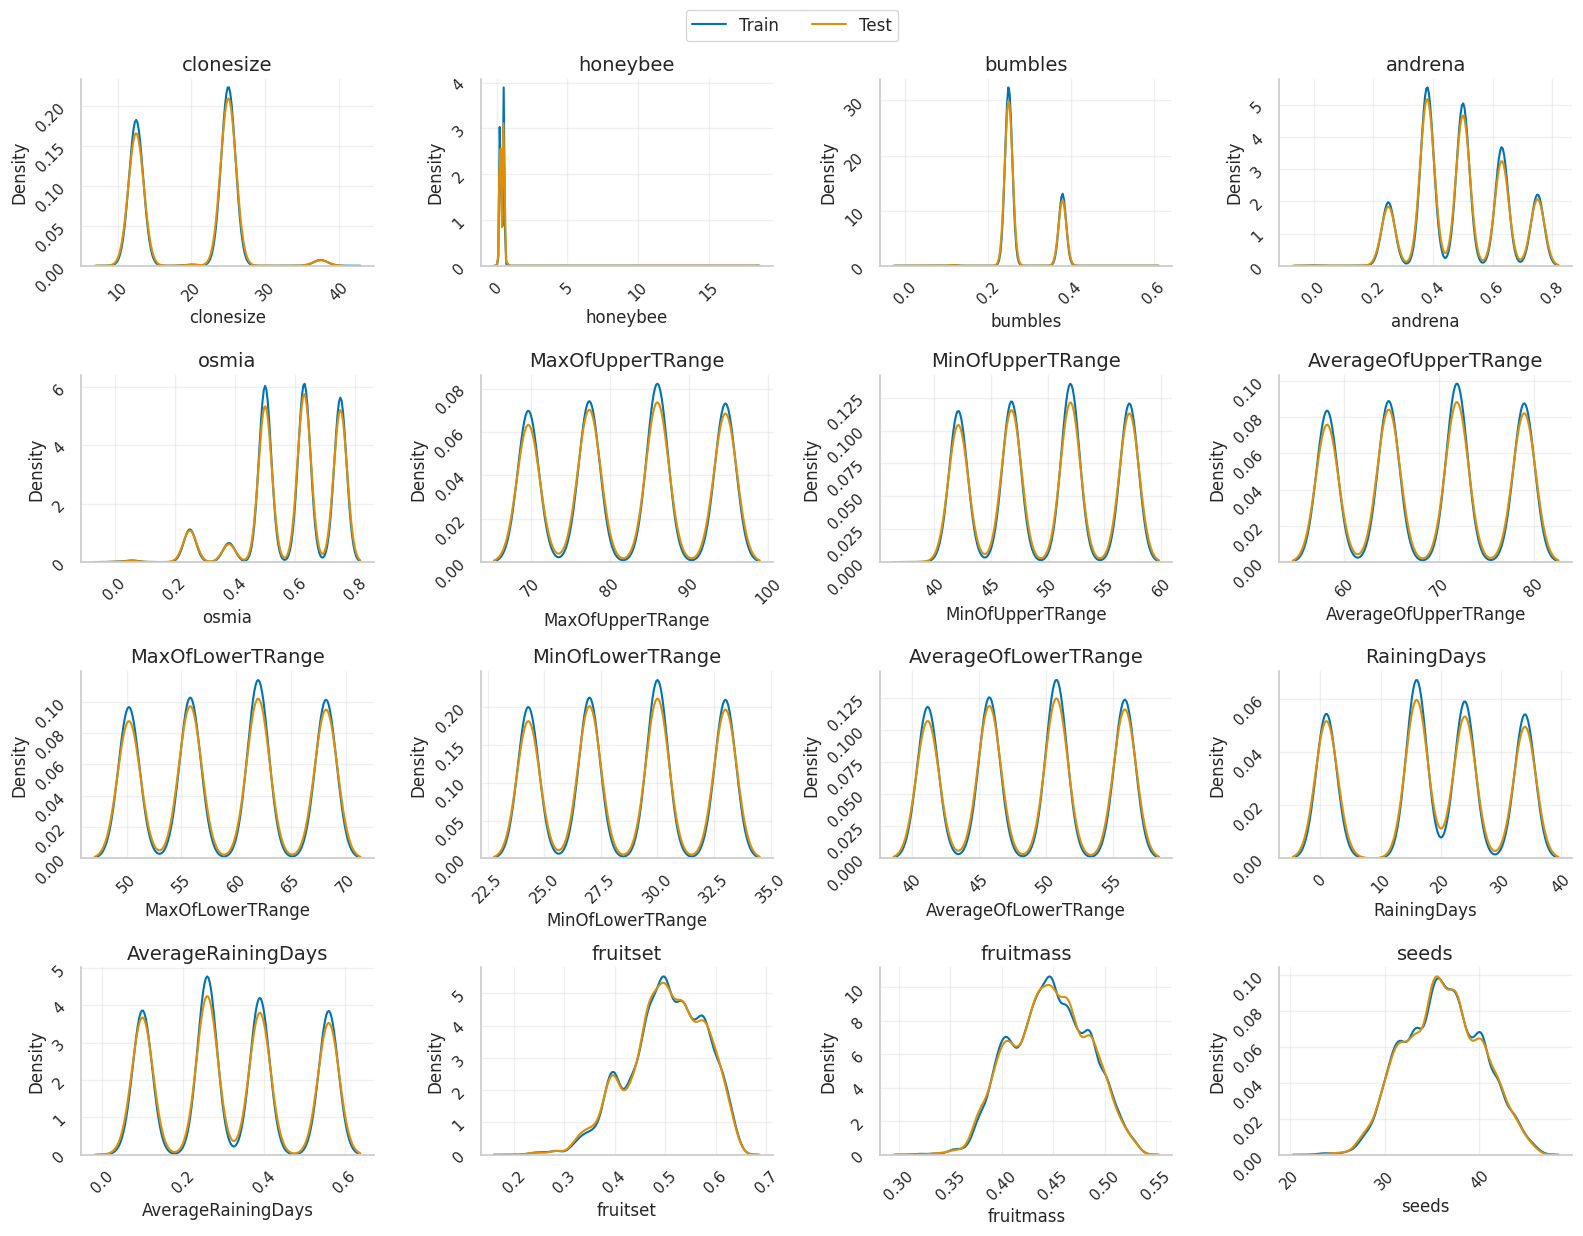

In [11]:
figure, ax = plt.subplots(4, 4, figsize=(16, 12))
ax = ax.flatten()

for index, col_name in enumerate(df_train.columns[:-1]):
    
    sns.kdeplot(data=df_train[col_name],
                label='Train',
                ax=ax[index])
    
    sns.kdeplot(data=df_test[col_name],
                label='Test',
                ax=ax[index])
   
    ax[index].set_title(col_name, fontsize=14)
    
    ax[index].tick_params(labelrotation=45)
    
    # Retrieve legend information
    handles = ax[index].get_legend_handles_labels()[0]
    labels = ax[index].get_legend_handles_labels()[1]
    ax[index].legend().remove()

# Set the legend
figure.legend(handles, 
              labels, 
              loc='upper center', 
              bbox_to_anchor=(0.5, 1.03), 
              fontsize=12,
              ncol=3)

plt.tight_layout()

- The distribution of the features is consistend between train and validation sets

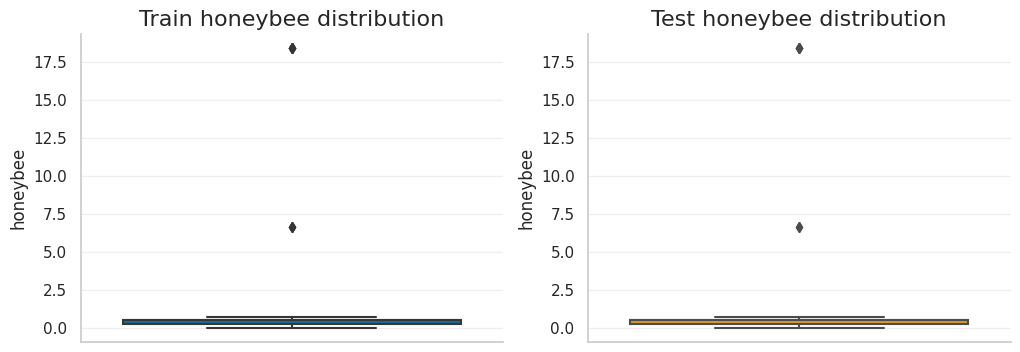

In [12]:
figure, ax = plt.subplots(1, 2)
ax = ax.flatten()

sns.boxplot(data=df_train, 
            y='honeybee',
            ax=ax[0])

sns.boxplot(data=df_test,
            y='honeybee',
            ax=ax[1],
            color='orange')

ax[0].set_title('Train honeybee distribution')

ax[1].set_title('Test honeybee distribution')

plt.show()

In [13]:
df_train['honeybee'].value_counts().sort_index(ascending=False).head(5)

18.430       5
6.640        3
0.750      110
0.537       38
0.500     7832
Name: honeybee, dtype: int64

- Outlyers of honeybees need to be dropped before modeling (just on df_train)

In [14]:
# dropping 'honeybee' values >= 5 in test
# df_train = df_train[df_train['honeybee'] < 5].reset_index()

## Label distribution KDE

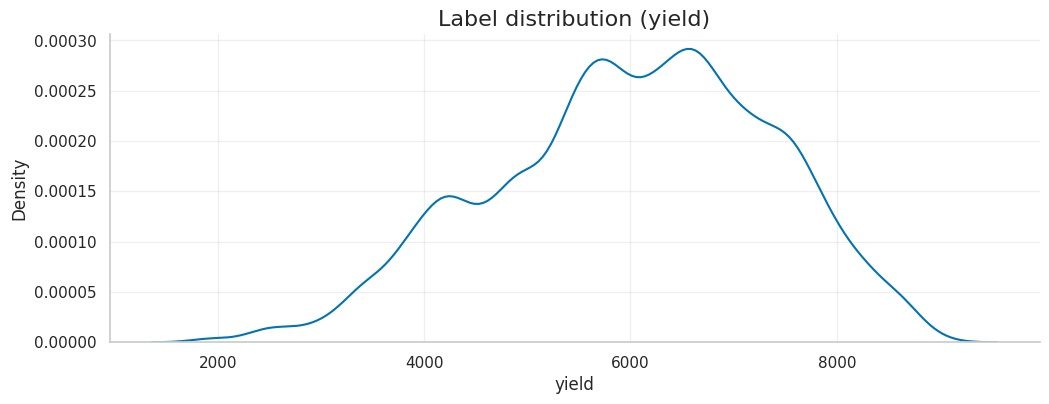

In [15]:
sns.kdeplot(data=df_train['yield'],
            label='Train')

plt.title('Label distribution (yield)')

plt.show()

The distribution of the label yield looks similar to the distribution of the features 'fruitset', 'fruitmass' and 'seeds'. Since these features are not described (see notebook intro) we can hypotesize that they have been inferred from the label yield.

## Pearson Correlation

In [16]:
# Generate correlation matrix
correlation_train = df_train.corr(method='pearson')

In [17]:
# Generate a mask for the upper triangle
correlation_mask = np.triu(np.ones_like(correlation_train, dtype=bool))

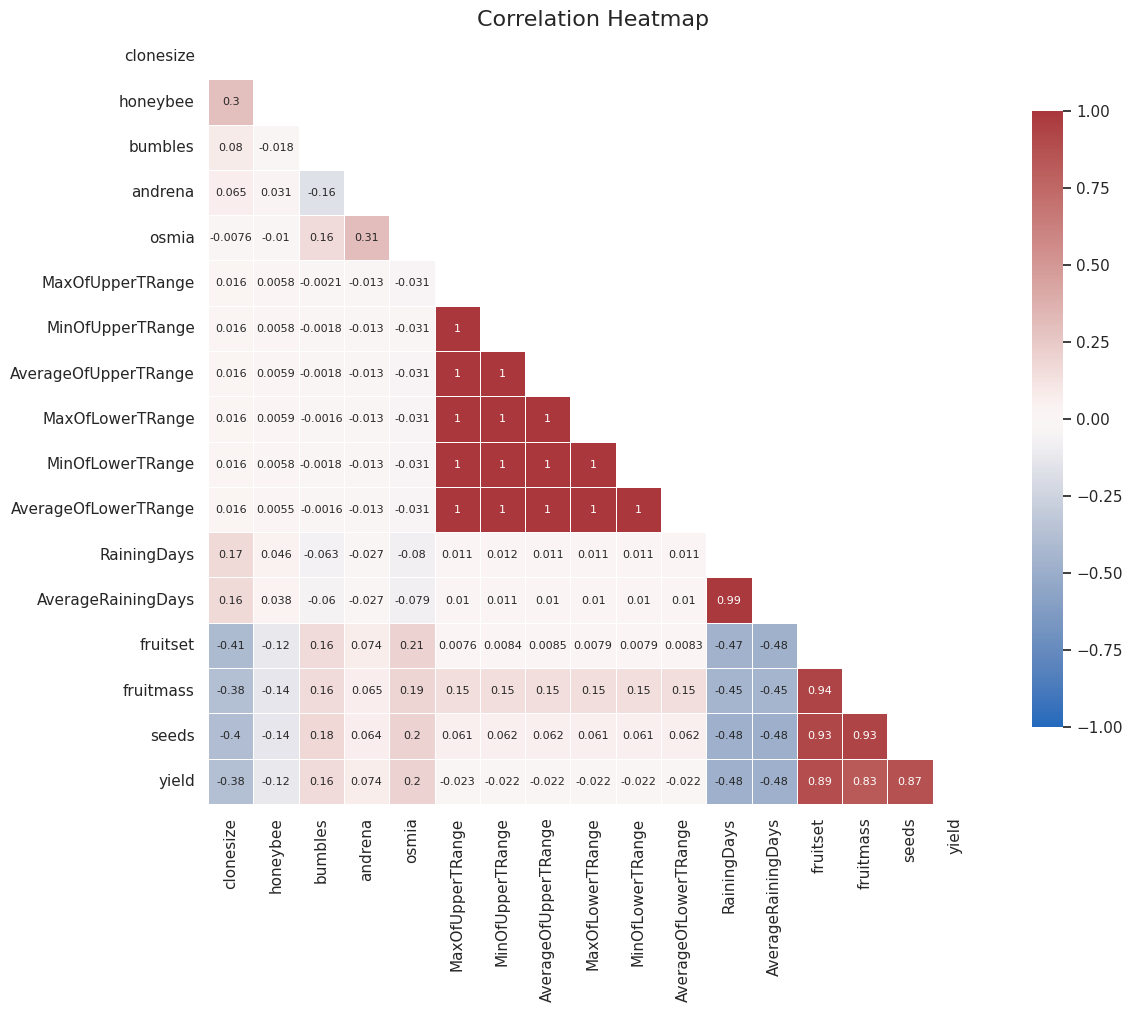

In [18]:
figure, ax = plt.subplots(figsize=(14, 10))

ax = sns.heatmap(correlation_train, 
            mask=correlation_mask, 
            cmap='vlag',
            vmax=1.0, 
            vmin=-1.0, 
            center=0, 
            square=True, 
            linewidths=.5, 
            annot=True,
            annot_kws={'fontsize': 8},
            cbar_kws={"shrink":.8, 'orientation':'vertical'})


ax.set_title('Correlation Heatmap')

plt.show()

- The correlation matrix shows a very similar and a high correlation behaviour between the features 'fruitset', 'fruitmass' and 'seeds and the lable 'yield', thus the above hypotesis was quite likely correct
- The feature 'clonesize' and 'honeybee' looks to be positively correlated (0.85), we can hypotesize that honeybees are attracted to blueberry cultivation with higher clonesize (maybe because the domestication of honeybees). Anyway, this doesn't appear to translate into a highet yield
- The temperature measures are duplicated, it's enough to keep just one
- Same with AverageRainingDays and RainingDays. Dropping AverageRainingDays

 ## Pairplot
 
 Plotting pairplots between main features to look at potential non-linear relaationships

In [19]:
df_train.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

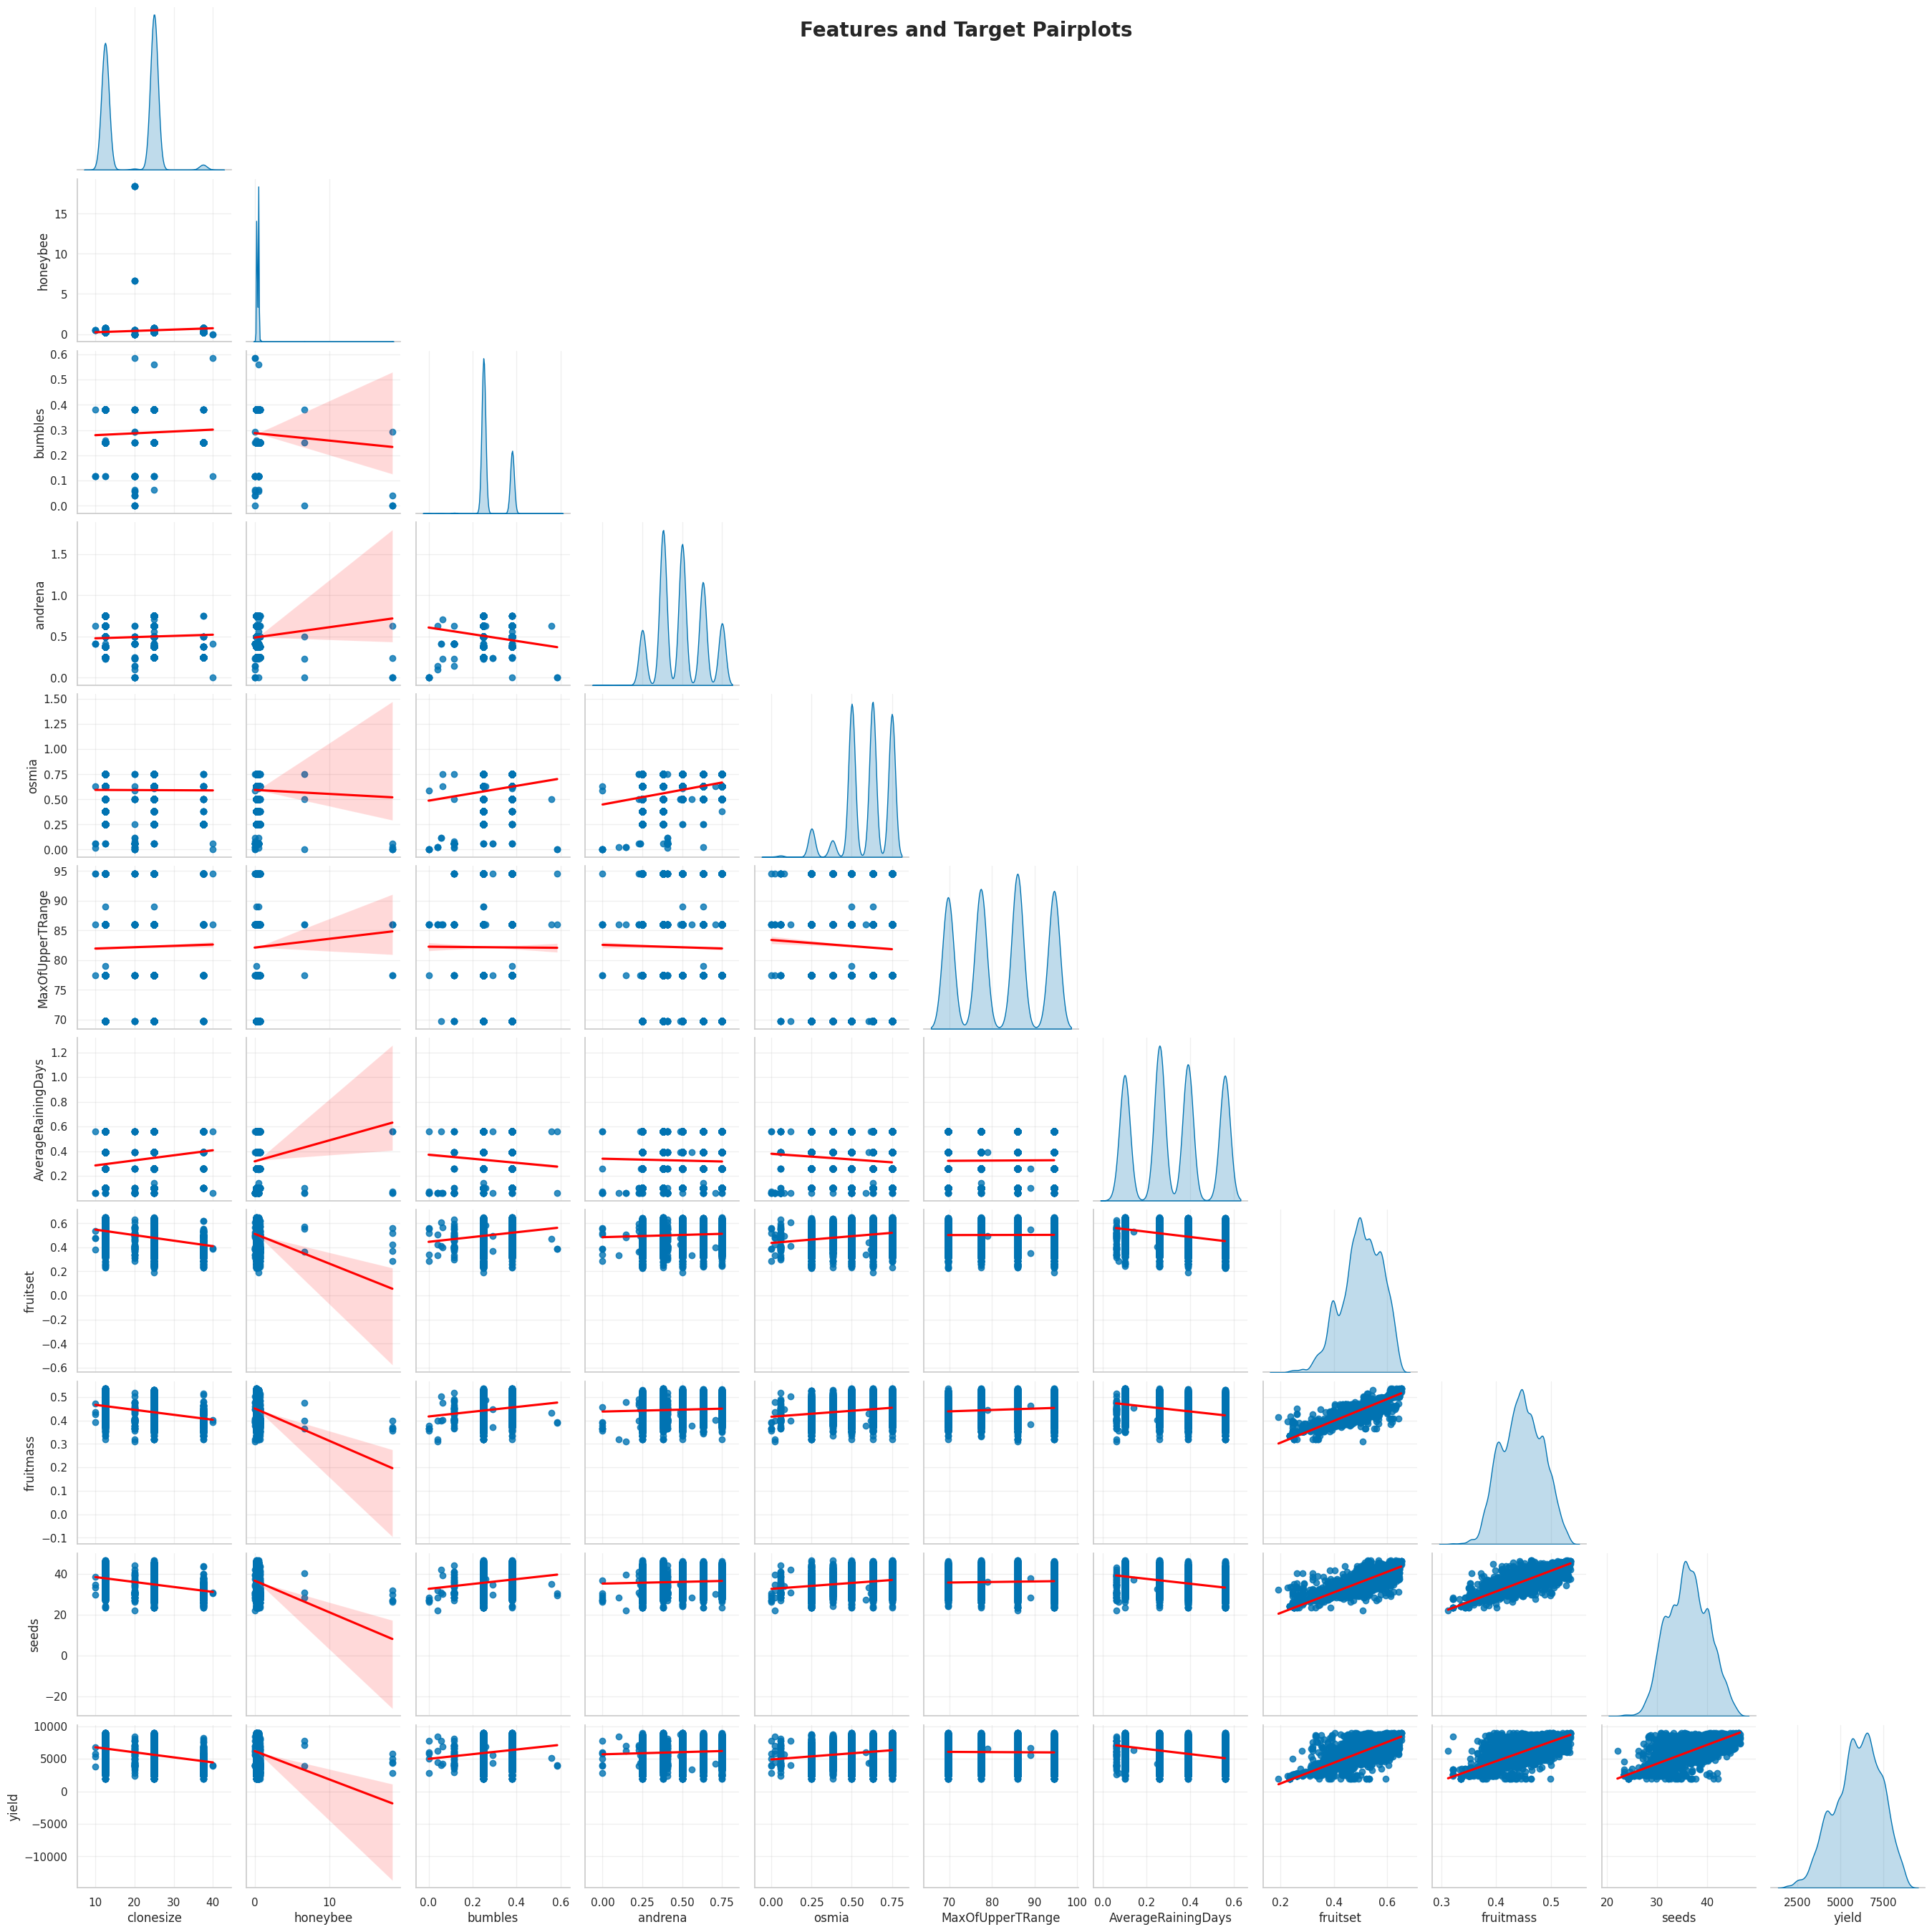

In [20]:
sns.pairplot(df_train[['clonesize', 
                       'honeybee', 
                       'bumbles', 
                       'andrena', 
                       'osmia', 
                       'MaxOfUpperTRange', 
                       'AverageRainingDays', 
                       'fruitset', 
                       'fruitmass', 
                       'seeds', 
                       'yield']],
             kind="reg",
             diag_kind='kde',
             plot_kws={'line_kws':{'color':'red'}},
             corner=True)

plt.suptitle('Features and Target Pairplots', 
             fontsize=20, 
             fontweight='bold')

plt.show()

The data are probably AI generated. Doesn't look like there are particular non-linar relationships between features.

# Preprocessing data before modeling

## Get the datasets model-ready

In [8]:
def compute_engineered_features(data: pd.DataFrame) -> pd.DataFrame:
    
    """
    Create engineered features to have the dataset model-ready
    
    Args:
        data Pandas.DataFrame input
    
    Returns:
        data Pandas.DataFrame with engineered features
    """
    
    # Create engineered features
    data['clonesize per honeybee'] = data['clonesize'] * data['honeybee']
    
    data['osmia per andrena'] = data['osmia'] * data['andrena']
    
    data['AverageRainingDays per fruitset'] = data['AverageRainingDays'] * data['fruitset']
    
    data['AverageRainingDays per seeds'] = data['AverageRainingDays'] * data['seeds']
    
    return data

In [9]:
# get the train data model-ready
df_train = compute_engineered_features(df_train.copy())

# get the test data model-ready
df_test = compute_engineered_features(df_test.copy())

## Defining features and label

In [10]:
features = ['clonesize', 
            'honeybee', 
            'bumbles', 
            'andrena', 
            'osmia', 
            'AverageOfUpperTRange',
            'AverageRainingDays', 
            'fruitset', 
            'fruitmass', 
            'seeds',
            'clonesize per honeybee',
            'osmia per andrena',
            'AverageRainingDays per fruitset',
            'AverageRainingDays per seeds']

label = ['yield']

## Scaling data

In [11]:
# Scaling train data with StandardScaler
scaler = StandardScaler(copy=True,
                        with_mean=True,
                        with_std=True)

scaler.fit(df_train[features])

df_train_scaled = pd.DataFrame(scaler.transform(df_train[features]))

# Scaling removed column names - put them back
df_train_scaled.columns = features

In [12]:
# Scaling test data
df_test_scaled = pd.DataFrame(scaler.transform(df_test[features]))

# Scaling removed column names - put them back
df_test_scaled.columns = features

## Splitting data between train and test set

In [13]:
# defining a seed
seed = 108

In [14]:
# Define X and y for the training set
X = df_train_scaled
y = np.ravel(df_train[label])

# Splitting train dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

# Model Training

In [32]:
# Define metric(s) to compare the models
metrics = ['MAE',
           'RMSE']

# Initialize DataFrame of model performance
performance = pd.DataFrame(columns=metrics)

## Linear Regression

In [33]:
%%time

# Instantiate a LinearRegression model
model_lr = LinearRegression()

# Fit logreg to the train set
model_lr.fit(X_train, y_train)

# predict y_pred values
y_pred_lr = model_lr.predict(X_test)

# Compute MAE metric
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Compute RMSE metric
rmse_lr = round(mean_squared_error(y_test, y_pred_lr) ** 0.5, 2)

print('MAE: {}'.format(mae_lr))
print('RMSE: {}'.format(rmse_lr))

MAE: 364.6781580439605
RMSE: 568.4
CPU times: user 59.6 ms, sys: 58 ms, total: 118 ms
Wall time: 49.8 ms


In [34]:
# Update 'performance' DataFrame
performance.loc['Linear Regression'] = [mae_lr,
                                        rmse_lr]

## Random Forest Regressor

In [36]:
# Defining Random Forest Regressor Hyperparameters
hyperparams_rf = {
    'n_estimators': 50,
    'criterion': 'absolute_error',
    'max_depth': 9,
    'min_samples_split': 10,
    'min_samples_leaf': 10,
    'random_state' : seed
}

In [37]:
%%time

# Instantiate rf
model_rf = RandomForestRegressor(**hyperparams_rf)
            
# Fit rf to the training set    
model_rf.fit(X_train, y_train) 

# Predict the test set labels
y_pred_rf = model_rf.predict(X_test)

# Compute MAE metric
mae_rf = mean_absolute_error(y_test, y_pred_rf)

# Compute RMSE metric
rmse_rf = round(mean_squared_error(y_test, y_pred_rf) ** 0.5, 2)

print('MAE: {}'.format(mae_rf))
print('RMSE: {}'.format(rmse_rf))

MAE: 337.57208137237416
RMSE: 552.71
CPU times: user 1min 13s, sys: 15.9 ms, total: 1min 13s
Wall time: 1min 13s


In [39]:
# Update 'performance' DataFrame
performance.loc['Random Forest Regressor'] = [mae_rf,
                                              rmse_rf]

## Gradient Boosting Regressor

In [40]:
%%time

# Instantiate gb
model_gb = GradientBoostingRegressor(max_depth=4, 
                                     n_estimators=200,
                                     random_state=seed)

# Fit gb to the training set
model_gb.fit(X_train, y_train)

# Predict test set labels
y_pred_gb = model_gb.predict(X_test)

# Compute MAE metric
mae_gb = mean_absolute_error(y_test, y_pred_gb)

# Compute RMSE metric
rmse_gb = round(mean_squared_error(y_test, y_pred_gb) ** 0.5, 2)

print('MAE: {}'.format(mae_gb))
print('RMSE: {}'.format(rmse_gb))

MAE: 351.41221297744573
RMSE: 551.76
CPU times: user 4.86 s, sys: 1 ms, total: 4.86 s
Wall time: 4.87 s


In [42]:
# Update 'performance' DataFrame
performance.loc['Gradient Boosting Regressor'] = [mae_gb, 
                                                  rmse_gb]

## XGBoost Regressor

In [43]:
# define XGBoost hyperparams dict
hyperparams_xgb = {
    'n_estimators' : 500,
    'max_depth' : 5,
    'learning_rate' : 0.01
}

In [44]:
# Define the model
model_xgb = XGBRegressor(**hyperparams_xgb)

# Train the xgb to the training set
model_xgb.fit(X_train, y_train)

# Get predictions
y_pred_xgb = model_xgb.predict(X_test)

# Compute MAE metric
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Compute RMSE metric
rmse_xgb = round(mean_squared_error(y_test, y_pred_xgb) ** 0.5, 2)

print('MAE: {}'.format(mae_xgb))
print('RMSE: {}'.format(rmse_xgb))

MAE: 350.15571116082043
RMSE: 549.72


In [45]:
# Update 'performance' DataFrame
performance.loc['XGBoost Regressor'] = [mae_xgb,
                                        rmse_xgb]

## LightGBM

In [46]:
# define LightGBM hyperparams dict
hyperparams_lgb = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'rmse',
    'force_row_wise': True,
    'n_estimators': 1000,
    'verbose': 0
}

In [47]:
%%time

# Define the model
model_lgb = lgb.LGBMRegressor(**hyperparams_lgb)

# Fit model to the training set
model_lgb.fit(X_train, np.ravel(y_train))

# Get predictions
y_pred_lgb = model_lgb.predict(X_test)

# Compute MAE metric
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

# Compute RMSE metric
rmse_lgb = round(mean_squared_error(y_test, y_pred_lgb) ** 0.5, 2)

print('MAE: {}'.format(mae_lgb))
print('RMSE: {}'.format(rmse_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
MAE: 398.3800958926534
RMSE: 598.75
CPU times: user 6.75 s, sys: 3.51 s, total: 10.3 s
Wall time: 5.66 s


In [49]:
# Update 'performance' DataFrame
performance.loc['LightGBM Regressor'] = [mae_lgb,
                                         rmse_lgb]

# Model comparison

In [50]:
performance

,MAE,RMSE
Linear Regression,364.678158,568.40
Random Forest Regressor,337.572081,552.71
Gradient Boosting Regressor,351.412213,551.76
XGBoost Regressor,350.155711,549.72
LightGBM Regressor,398.380096,598.75


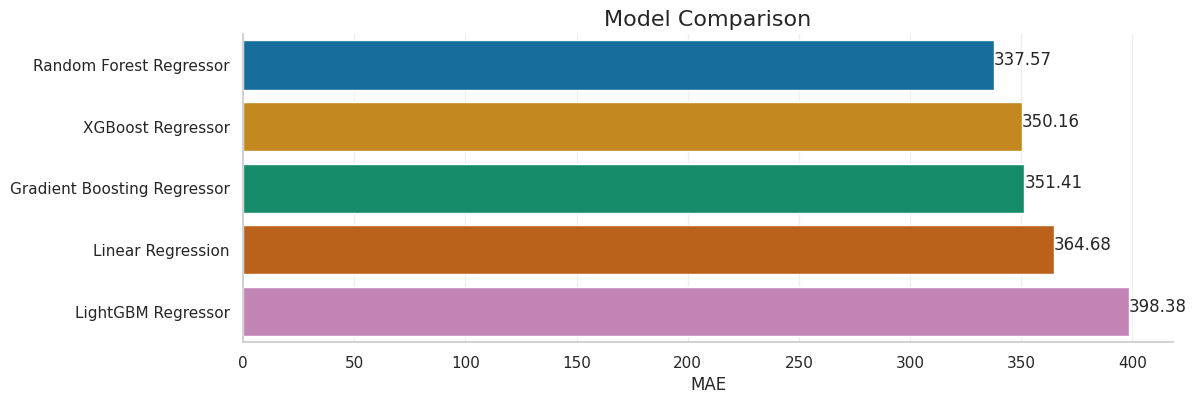

In [51]:
# Sort dataframe by the metric
performance.sort_values('MAE', inplace=True)

# Plot model metrics
ax = sns.barplot(data=performance, 
                 x='MAE', 
                 y=performance.index.tolist())

# Add data labels to the bars
for i, v in enumerate(performance['MAE']):
    ax.text(v + 0.01, i, str(round(v, 2)))

ax.set_title('Model Comparison')

plt.show()

## Tuning best sklearn model hyperparameters

In [30]:
%%time

# Define a dictionary containing the parameters to tune
params_model_rf = {
    'n_estimators': [25, 50, 100],
    'criterion': ['absolute_error'],
    'max_depth': [4, 9, 12],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10, 15]
}

# Instantiate grid_gb
grid_model_rf = GridSearchCV(estimator=RandomForestRegressor(random_state=seed),
                       param_grid=params_model_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=3,
                       n_jobs=1)

# Fit grid_model_rf
grid_model_rf.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END criterion=absolute_error, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=25;, score=-335231.794 total time=  14.5s
[CV 2/3] END criterion=absolute_error, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=25;, score=-354630.221 total time=  14.5s
[CV 3/3] END criterion=absolute_error, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=25;, score=-386907.138 total time=  14.6s
[CV 1/3] END criterion=absolute_error, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-335870.695 total time=  29.0s
[CV 2/3] END criterion=absolute_error, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-354497.552 total time=  29.1s
[CV 3/3] END criterion=absolute_error, max_depth=4, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=-386677.408 total time=  29.1s
[CV 1/3] END criterion=absolute_error, max_depth=4

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=108), n_jobs=1,
             param_grid={'criterion': ['absolute_error'],
                         'max_depth': [4, 9, 12],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [25, 50, 100]},
             scoring='neg_mean_squared_error', verbose=3)

In [31]:
# Extract best hyperparams
best_params_rf = grid_model_rf.best_params_

print('Best hyperparameters for Random Forest Regressor:\n', best_params_rf)

Best hyperparameters for Random Forest Regressor:
 {'criterion': 'absolute_error', 'max_depth': 12, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [40]:
%%time

# Extract the best model performance
best_model_rf = grid_model_rf.best_estimator_

# Predict test set labels using the best model
y_pred_best_rf = best_model_rf.predict(X_test)

# Compute MAE
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

# Compute RMSE
rmse_best_rf = round(mean_squared_error(y_test, y_pred_best_rf) ** 0.5, 2)

print('MAE best rf: {}'.format(mae_best_rf))
print('RMSE best rf: {}'.format(rmse_best_rf))

MAE best rf: 340.5776046902795
RMSE best rf: 552.43
CPU times: user 89 ms, sys: 1e+03 µs, total: 90 ms
Wall time: 88.2 ms


In [37]:
# Update 'performance' DataFrame
performance.loc['Tuned Gradient Boosting Regressor'] = [mae_best_rf,
                                                        rmse_best_rf]

Comment: I used the wrong scoring (MSE) and since this little maneuver's gonna cost me 51 years, I'm not rerunning the GridSearch again
<br>✨Lesson learned✨

### Best Sklearn Model

In [52]:
# Defining Random Forest Regressor Hyperparameters Based on GridSearch (to not rerun it)
hyperparams_best_rf = {
           'criterion': 'absolute_error', 
           'max_depth': 12, 
           'min_samples_leaf': 5, 
           'min_samples_split': 5, 
           'n_estimators': 100
}

In [53]:
%%time

# Instantiate rf
model_best_rf = RandomForestRegressor(**hyperparams_best_rf)
            
# Fit rf to the training set    
model_best_rf.fit(X_train, y_train) 

# Predict the test set labels
y_pred_best_rf = model_best_rf.predict(X_test)

# Compute MAE metric
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

# Compute RMSE metric
rmse_best_rf = round(mean_squared_error(y_test, y_pred_best_rf) ** 0.5, 2)

print('MAE: {}'.format(mae_best_rf))
print('RMSE: {}'.format(rmse_best_rf))

MAE: 339.2011802984642
RMSE: 549.33
CPU times: user 2min 35s, sys: 10.4 ms, total: 2min 35s
Wall time: 2min 35s


In [59]:
# Update 'performance' DataFrame
performance.loc['Tuned Random Forest Regressor'] = [mae_best_rf,
                                                        rmse_best_rf]

## Tuning XGBoost model

In [16]:
%%time

# Define a dictionary containing the parameters to tune
params_model_xgb = {
    'n_estimators': [55, 250, 500],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
}

# Instantiate grid_gb
grid_model_xgb = GridSearchCV(estimator=XGBRegressor(random_state=seed),
                       param_grid=params_model_xgb,
                       scoring='neg_mean_absolute_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)

# Fit grid_model_rf
grid_model_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
CPU times: user 1.67 s, sys: 111 ms, total: 1.78 s
Wall time: 1min 1s


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=108, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [55, 250, 500]},
             scoring='neg_mean_absolute_error', verbose=1)

In [55]:
# Extract best hyperparams
best_params_xgb = grid_model_xgb.best_params_

print('Best hyperparameters for XGBoost model:\n', best_params_xgb)

Best hyperparameters for XGBoost model:
 {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 55}


In [56]:
# Extract the best model performance
best_model_xgb = grid_model_xgb.best_estimator_

# Predict test set labels using the best model
y_pred_best_xgb = best_model_xgb.predict(X_test)

# Compute MAE metric
mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

# Compute RMSE metric
rmse_best_xgb = round(mean_squared_error(y_test, y_pred_best_xgb) ** 0.5, 2)

print('MAE: {}'.format(mae_best_xgb))
print('RMSE: {}'.format(rmse_best_xgb))

MAE: 349.68546434403487
RMSE: 549.33


In [57]:
# Update 'performance' DataFrame
performance.loc['Tuned XGBoost Regressor'] = [mae_best_xgb,
                                              rmse_best_xgb]

In [67]:
performance

,MAE,RMSE
Random Forest Regressor,337.572081,552.71
Tuned Gradient Boosting Regressor,339.201180,549.33
Tuned Random Forest Regressor,339.201180,549.33
Tuned XGBoost Regressor,349.685464,549.33
XGBoost Regressor,350.155711,549.72
Gradient Boosting Regressor,351.412213,551.76
Linear Regression,364.678158,568.40
LightGBM Regressor,398.380096,598.75


## Updating model comparison after tuning the better performing models

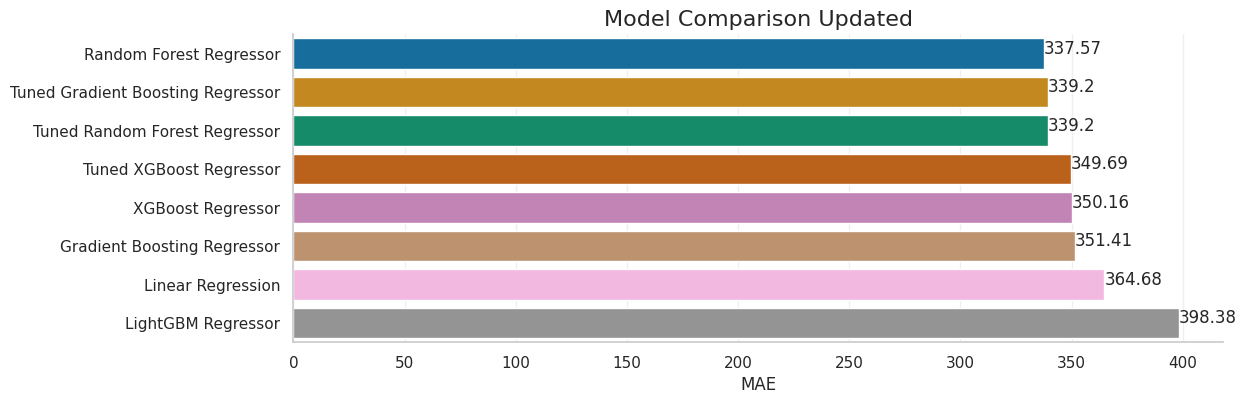

In [60]:
# Sort dataframe by the metric
performance.sort_values('MAE', inplace=True)

# Plot model metrics
ax = sns.barplot(data=performance, 
                 x='MAE', 
                 y=performance.index.tolist())

# Add data labels to the bars
for i, v in enumerate(performance['MAE']):
    ax.text(v + 0.01, i, str(round(v, 2)))

ax.set_title('Model Comparison Updated')

plt.show()

# Model Diagnostic

Diagnostic the fit of the best performing models
 - (tuned) xgboost regressor
 - sklearn (tuned) gradient boosting regressor

## Feature Importance

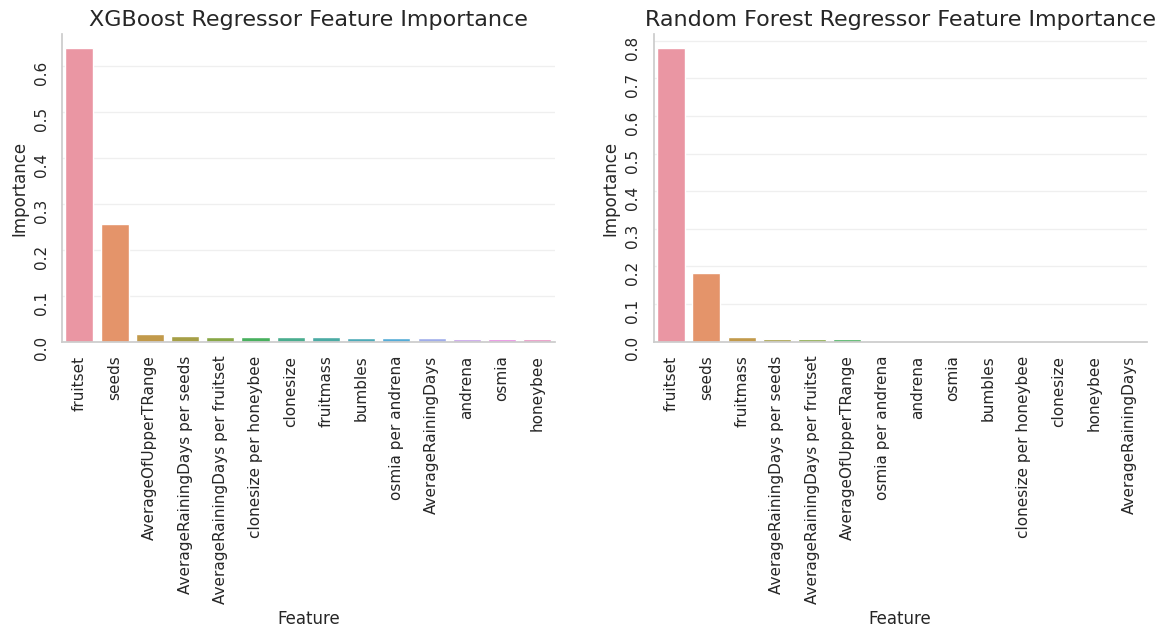

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Compute the feature importance
importances_xgb = sorted(list(zip(best_model_xgb.feature_names_in_,
                              best_model_xgb.feature_importances_)))

# Transform it into a DataFrame
importances_xgb_df = pd.DataFrame(importances_xgb,
                                     columns= ['Feature', 'Importance'])

# Sorting importances
importances_xgb_df = importances_xgb_df.sort_values(['Importance'], ascending=False).reset_index(drop=True)

# Plot the feature importance
ax[0] = sns.barplot(data=importances_xgb_df, 
                 x='Feature', 
                 y='Importance',
                 ax=ax[0])
ax[0].set_title('XGBoost Regressor Feature Importance')
ax[0].tick_params(labelrotation=90)

# Compute the feature importance
importances_rf = sorted(list(zip(model_rf.feature_names_in_,
                              model_rf.feature_importances_)))

# Transform it into a DataFrame
importances_rf_df = pd.DataFrame(importances_rf,
                                     columns= ['Feature', 'Importance'])

# Sorting importances
importances_rf_df = importances_rf_df.sort_values(['Importance'], ascending=False).reset_index(drop=True)

# Plot the feature importance
ax[1] = sns.barplot(data=importances_rf_df, 
                 x='Feature', 
                 y='Importance',
                 ax=ax[1])
ax[1].set_title('Random Forest Regressor Feature Importance')
ax[1].tick_params(labelrotation=90)

plt.show()

## Learning curve

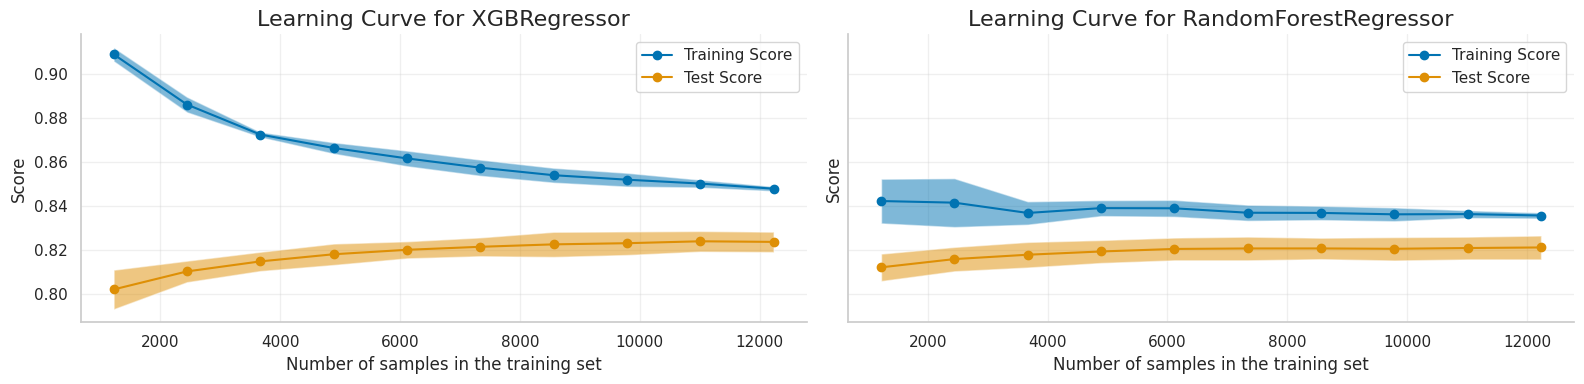

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(16,4))

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 10),
    "cv": ShuffleSplit(n_splits=5, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Score",
}

for ax_idx, estimator in enumerate([model_xgb, model_rf]):
    
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    
    handles, label = ax[ax_idx].get_legend_handles_labels()
    
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")
    
plt.tight_layout()

## Residuals

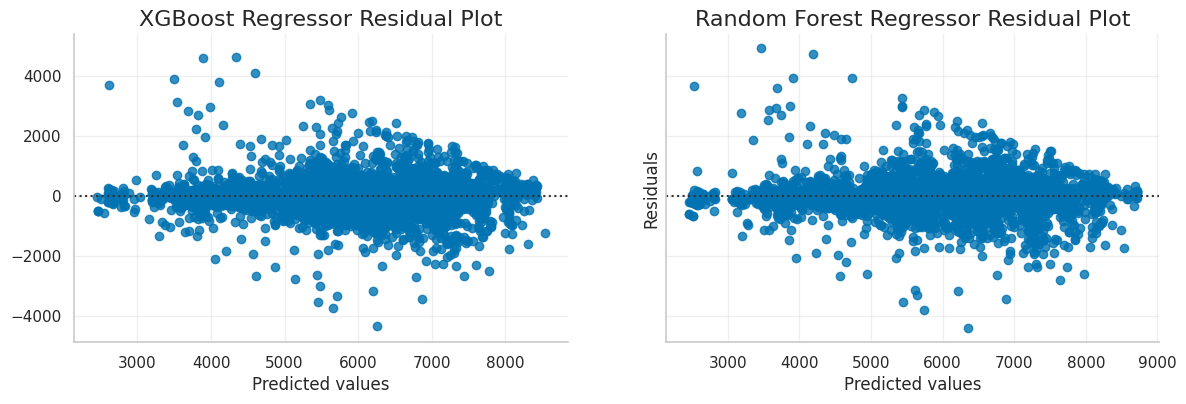

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(14,4))

# Create a DataFrame of residuals for best_model_xgb
residuals_xgb = y_test - y_pred_best_xgb
df_resid_xgb = pd.DataFrame({'residuals': residuals_xgb, 'y_pred_best_xgb': y_pred_best_xgb})

# Plot the residuals for best_model_xgb
sns.residplot(x='y_pred_best_xgb',
              y='residuals', 
              data=df_resid_xgb, 
              ax=ax[0])
ax[0].set_title('XGBoost Regressor Residual Plot', fontsize=16)
ax[0].set_xlabel('Predicted values')
ax[0].set_ylabel('')

# Create a DataFrame of residuals for best_model_gb
residuals_rf = y_test - y_pred_rf
df_resid_rf = pd.DataFrame({'residuals': residuals_rf, 'y_pred_rf': y_pred_rf})

# Plot the residuals for best_model_gb
sns.residplot(x='y_pred_rf', 
              y='residuals', 
              data=df_resid_rf, 
              ax=ax[1])
ax[1].set_title('Random Forest Regressor Residual Plot', fontsize=16)
ax[1].set_xlabel('Predicted values')
ax[1].set_ylabel('Residuals')

plt.show()

## Q-Q Plot

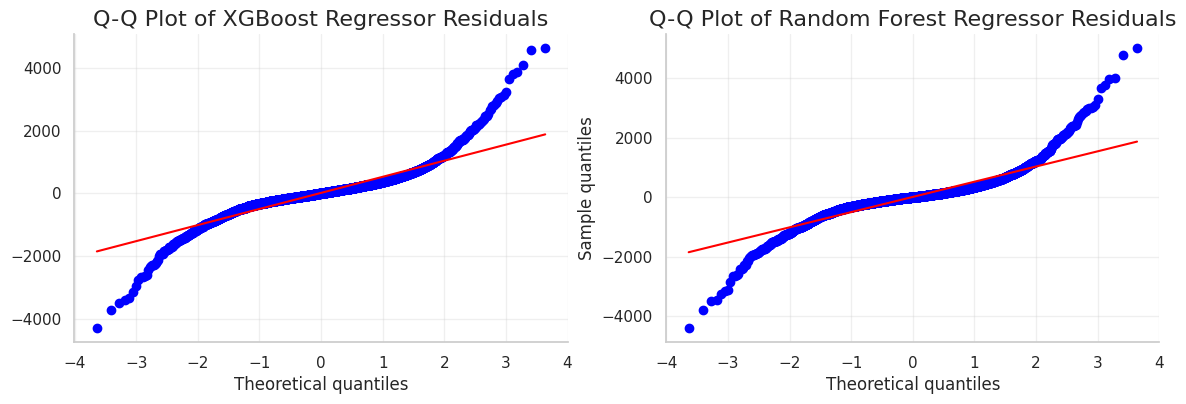

In [70]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Calculate the residuals for best_model_xgb
residuals_xgb = y_test - y_pred_best_xgb

# Generate a QQ plot for best_model_xgb
stats.probplot(residuals_xgb, 
               plot=ax[0])
ax[0].set_title('Q-Q Plot of XGBoost Regressor Residuals', fontsize=16)
ax[0].set_xlabel('Theoretical quantiles')
ax[0].set_ylabel('')

# Calculate the residuals for best_model_gb
residuals_rf = y_test - y_pred_rf

# Generate a QQ plot for model 1
stats.probplot(residuals_rf, 
               plot=ax[1])
ax[1].set_title('Q-Q Plot of Random Forest Regressor Residuals', fontsize=16)
ax[1].set_xlabel('Theoretical quantiles')
ax[1].set_ylabel('Sample quantiles')

plt.show()

## Actual Values vs Predicted Values

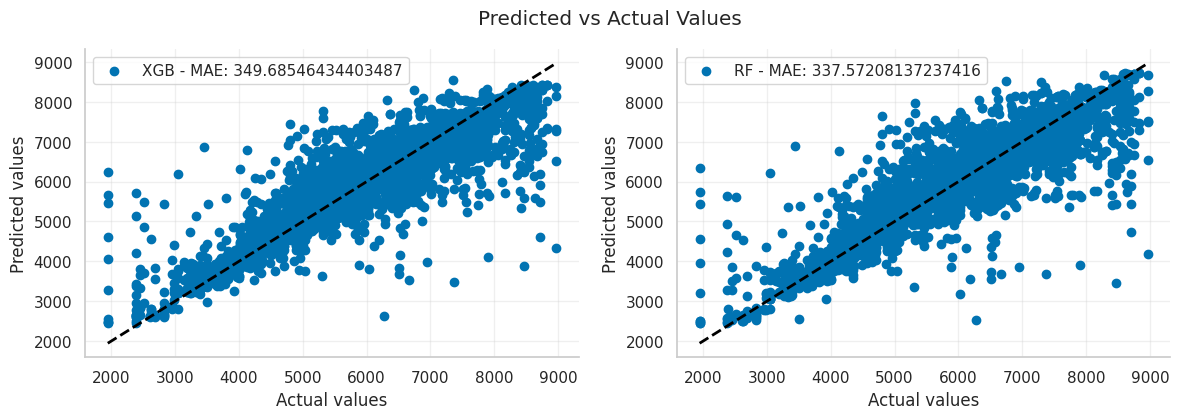

In [71]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))

# Plot the predicted vs actual values for each model
ax[0].scatter(y_test, 
            y_pred_best_xgb, 
            label='XGB - MAE: {}'.format(mae_best_xgb))
ax[0].plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'k--', 
         lw=2)

ax[1].scatter(y_test, 
            y_pred_rf, 
            label='RF - MAE: {}'.format(mae_rf))
ax[1].plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'k--', 
         lw=2)

# Add a legend to the plot
ax[0].legend()
ax[1].legend()

# Set x and y axis labels for the plot
ax[0].set_xlabel('Actual values')
ax[0].set_ylabel('Predicted values')
ax[1].set_xlabel('Actual values')
ax[1].set_ylabel('Predicted values')

fig.suptitle('Predicted vs Actual Values')

plt.show()

## Diagnostic considerations

from the various diagnostic plot we see that the models behave similarly.

- They both slightly overfit the trainig set (disproportion among features contribution and steeper learning curve for the training set against the test test)
- Both models are have quite poor performance in predicting extreme values (see Q-Q plots and Predicted vs Actual values plots)

I'm submitting RF anyway because of MAE

# Challenge Submission

In [71]:
# Generate predictions with test set with the besst performing model (based on MAE)
submission_predictions = model_rf.predict(df_test_scaled)

In [72]:
df_test_scaled.head()

,clonesize,honeybee,bumbles,andrena,osmia,AverageOfUpperTRange,AverageRainingDays,fruitset,fruitmass,seeds,clonesize per honeybee,osmia per andrena,AverageRainingDays per fruitset,AverageRainingDays per seeds
0,0.802929,-0.385238,-0.613664,-1.638479,-2.454434,0.424487,0.401611,-1.389674,-1.038628,-1.183437,-0.259001,-1.981124,-0.019062,0.155064
1,-1.092448,-0.385238,-0.613664,1.737386,0.269883,1.353617,-1.367767,-0.197520,-0.099560,0.169192,-0.636043,1.464541,-1.453075,-1.424736
2,-1.092448,-0.385238,-0.613664,0.927179,0.269883,0.424487,-0.391558,1.084029,1.093698,0.960739,-0.636043,0.829194,-0.073697,-0.183461
3,0.802929,0.306073,1.556078,-0.760754,0.269883,0.424487,-0.391558,-0.937347,-0.640116,-0.756362,0.495083,-0.494446,-0.597897,-0.515621
4,2.698305,0.997385,-0.613664,-1.638479,-2.454434,1.353617,0.401611,-1.905506,-1.557820,-1.639049,2.380292,-1.981124,-0.219717,0.022862


In [73]:
# Create submission DataFrame
submission = pd.DataFrame({'id': df_test.id, 'yield': submission_predictions})

In [74]:
submission.head()

,id,yield
0,15289,4289.819336
1,15290,6109.778320
2,15291,7152.412109
3,15292,4709.070801
4,15293,4099.911133


In [75]:
# Write CSV File
submission.to_csv('./submission.csv', index=False)